In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_sequential_feature_selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

##### Read features as dataframes

In [3]:
year_name = [f'{i}_{i+2}' for i in range(1990,2020,3)]
sample_name = [f'Landsat_{year}' for year in year_name] + ['Sentinel_2014_2016','Sentinel_2017_2019']

In [4]:
# import the points with image values 
Landsat_pt  = [pd.read_csv(f'./Data/Landsat_{year}.csv') for year in year_name]
Sentinel_pt = [pd.read_csv(f'./Data/Sentinel_{year}.csv') for year in year_name[-2:]]

In [5]:
# merge all pt_with_img and remove unnecessary columns
feature_df = Landsat_pt + Sentinel_pt
feature_df = [fe.drop(['system:index','.geo','split'],axis=1) for fe in feature_df]

##### train_test_split and apply randomforest_classifier

In [7]:
sfs_df_list = []

# loop through each year and use SequentialFeatureSelector to select features
for df,name in zip(feature_df,sample_name):
    
    X = df.drop(['Built'],axis=1)
    y = df['Built']
    
    # instantiate the SFS, where cross_validation folds is 4
    sfs = SFS(RandomForestClassifier(n_jobs=-1,
                                     n_estimators=50),
                                     k_features=20,
                                     forward=True,
                                     floating=False,
                                     verbose=2,
                                     scoring='accuracy',
                                     cv=4,
                                     n_jobs=-1).fit(X,y)
    
    # get the accuracy from SFS
    sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
    sfs_df['year'] = [name] * len(sfs_df)
    
    sfs_df_list.append(sfs_df)
    
    print(f'Search SFS for {name} completed!')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:    9.0s finished

[2020-07-31 18:09:51] Features: 1/20 -- score: 0.7460188971181873[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   12.4s finished

[2020-07-31 18:10:03] Features: 2/20 -- score: 0.797483965454928[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:   11.6s finished

[2020-07-31 18:10:15] Features: 3/20 -- score: 0.8739317046155396[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  40 out of

Search SFS for Landsat_1990_1992 completed!


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:   10.3s finished

[2020-07-31 18:14:27] Features: 1/20 -- score: 0.7454177229263954[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   12.5s finished

[2020-07-31 18:14:40] Features: 2/20 -- score: 0.8117712919724261[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:   11.8s finished

[2020-07-31 18:14:51] Features: 3/20 -- score: 0.8779613075383589[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   14.4s finished

[2020-07-31 18:15:06] Features: 4/20 -- s

Search SFS for Landsat_1993_1995 completed!


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:   11.4s finished

[2020-07-31 18:19:18] Features: 1/20 -- score: 0.7279738421839901[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   11.5s finished

[2020-07-31 18:19:30] Features: 2/20 -- score: 0.7788957943144863[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:   11.8s finished

[2020-07-31 18:19:42] Features: 3/20 -- score: 0.8445567698410275[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   14.2s finished

[2020-07-31 18:19:56] Features: 4/20 -- s

Search SFS for Landsat_1996_1998 completed!


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:   10.4s finished

[2020-07-31 18:23:45] Features: 1/20 -- score: 0.7334779706275033[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   10.6s finished

[2020-07-31 18:23:56] Features: 2/20 -- score: 0.7955607476635514[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:   11.2s finished

[2020-07-31 18:24:07] Features: 3/20 -- score: 0.8523030707610147[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   14.4s finished

[2020-07-31 18:24:22] Features: 4/20 -- s

Search SFS for Landsat_1999_2001 completed!


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:   11.2s finished

[2020-07-31 18:28:19] Features: 1/20 -- score: 0.7259661214744335[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   12.4s finished

[2020-07-31 18:28:31] Features: 2/20 -- score: 0.7856551696385455[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:   12.0s finished

[2020-07-31 18:28:43] Features: 3/20 -- score: 0.827287370557831[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   13.6s finished

[2020-07-31 18:28:57] Features: 4/20 -- sc

Search SFS for Landsat_2002_2004 completed!


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:   10.7s finished

[2020-07-31 18:33:00] Features: 1/20 -- score: 0.7220372836218376[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   11.0s finished

[2020-07-31 18:33:11] Features: 2/20 -- score: 0.7676431424766977[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:   11.4s finished

[2020-07-31 18:33:22] Features: 3/20 -- score: 0.8117509986684421[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   13.4s finished

[2020-07-31 18:33:36] Features: 4/20 -- s

Search SFS for Landsat_2005_2007 completed!


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:   11.0s finished

[2020-07-31 18:37:30] Features: 1/20 -- score: 0.7340531561461794[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   11.6s finished

[2020-07-31 18:37:42] Features: 2/20 -- score: 0.7838870431893687[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:   11.3s finished

[2020-07-31 18:37:53] Features: 3/20 -- score: 0.8514950166112957[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   14.2s finished

[2020-07-31 18:38:08] Features: 4/20 -- s

Search SFS for Landsat_2008_2010 completed!


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   10.6s finished

[2020-07-31 18:42:03] Features: 1/20 -- score: 0.7388039575924085[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:   11.3s finished

[2020-07-31 18:42:14] Features: 2/20 -- score: 0.7642723315392934[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  43 out of  43 | elapsed:   11.8s finished

[2020-07-31 18:42:26] Features: 3/20 -- score: 0.8145482904872119[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   15.2s finished

[2020-07-31 18:42:42] Features: 4/20 -- s

Search SFS for Landsat_2011_2013 completed!


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:   10.9s finished

[2020-07-31 18:47:03] Features: 1/20 -- score: 0.7327874331550803[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:   11.5s finished

[2020-07-31 18:47:15] Features: 2/20 -- score: 0.7752339572192514[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   11.8s finished

[2020-07-31 18:47:27] Features: 3/20 -- score: 0.8238636363636364[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:   14.3s finished

[2020-07-31 18:47:41] Features: 4/20 -- s

Search SFS for Landsat_2014_2016 completed!


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:   11.1s finished

[2020-07-31 18:52:03] Features: 1/20 -- score: 0.8027895652346599[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:   11.5s finished

[2020-07-31 18:52:14] Features: 2/20 -- score: 0.8197560560598511[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   11.2s finished

[2020-07-31 18:52:26] Features: 3/20 -- score: 0.8368911218108422[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  44 out of  44 | elapsed:   14.4s finished

[2020-07-31 18:52:40] Features: 4/20 -- s

Search SFS for Landsat_2017_2019 completed!


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.7s finished

[2020-07-31 18:57:09] Features: 1/20 -- score: 0.7492925275335853[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:   15.6s finished

[2020-07-31 18:57:25] Features: 2/20 -- score: 0.773898568112003[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:   15.5s finished

[2020-07-31 18:57:40] Features: 3/20 -- score: 0.8259354517914526[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   19.3s finished

[2020-07-31 18:58:00] Features: 4/20 -- sc

Search SFS for Sentinel_2014_2016 completed!


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.5s finished

[2020-07-31 19:04:10] Features: 1/20 -- score: 0.8161843285100245[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:   15.2s finished

[2020-07-31 19:04:25] Features: 2/20 -- score: 0.838812087404537[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:   15.3s finished

[2020-07-31 19:04:41] Features: 3/20 -- score: 0.901405345656883[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   18.7s finished

[2020-07-31 19:04:59] Features: 4/20 -- sco

Search SFS for Sentinel_2017_2019 completed!


[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:   24.9s finished

[2020-07-31 19:11:10] Features: 20/20 -- score: 0.9506190732716282

In [27]:
# # concat all sfs_df into one df
# sfs_all = pd.concat(sfs_df_list,axis=0)
# sfs_all.reset_index(inplace=True)

# # save sfs_all 
# sfs_all.to_csv('./Result/SFS.csv',index=False)

# load sfs_all df
sfs_all = pd.read_csv('./Result/SFS.csv')
sfs_all['index'] = sfs_all['index'].astype('category')
sfs_all['year']  = sfs_all['year'].astype('category')

##### Observe that 15 features are enough for classification

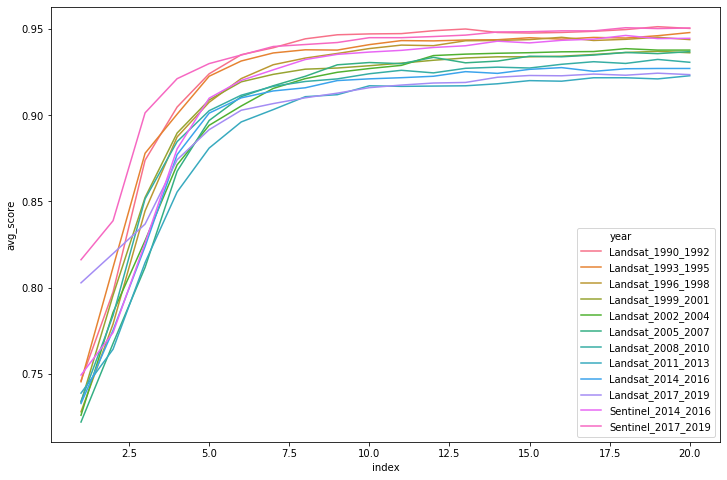

In [36]:
plt.figure(figsize=[12,8])
sns.lineplot(data = sfs_all,x='index',y = 'avg_score',hue='year')

##### Observe that use sample of 2017_2019 will increase the accuracy

In [33]:
df_2014_2019 = sfs_all[(sfs_all['year'].str.contains("2014_2016"))|(sfs_all['year'].str.contains("2017_2019"))]

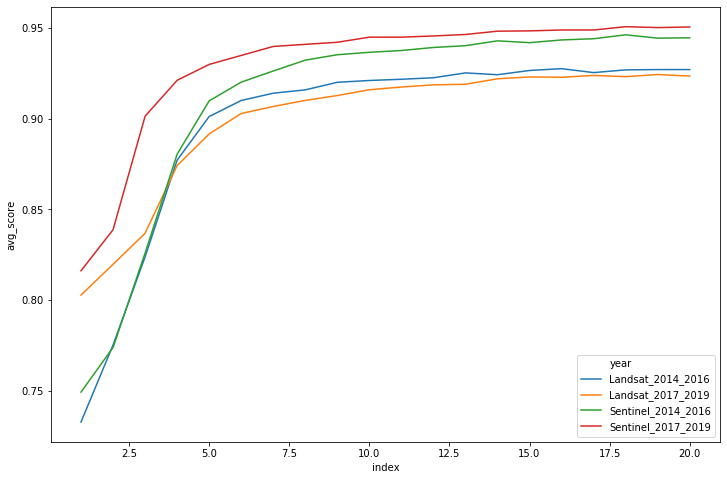

In [35]:
plt.figure(figsize=[12,8])
sns.lineplot(data = df_2014_2019,x='index',y = 'avg_score',hue='year')